In [134]:

from google.colab import drive
drive.mount('/content/drive')

# train.csvとtest.csvが格納されているディレクトリを指定
target_directory = '/content/drive/MyDrive/kaggle/titanic'

# 作業ディレクトリを変更
os.chdir(target_directory)

for dirname, _, filenames in os.walk(target_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/kaggle/titanic/README.md
/content/drive/MyDrive/kaggle/titanic/.gitignore
/content/drive/MyDrive/kaggle/titanic/submission_ver3.csv
/content/drive/MyDrive/kaggle/titanic/.git/description
/content/drive/MyDrive/kaggle/titanic/.git/COMMIT_EDITMSG
/content/drive/MyDrive/kaggle/titanic/.git/index
/content/drive/MyDrive/kaggle/titanic/.git/HEAD
/content/drive/MyDrive/kaggle/titanic/.git/config
/content/drive/MyDrive/kaggle/titanic/.git/objects/bb/e396eda85b64872c67198b3ab3883cd69a7b4e
/content/drive/MyDrive/kaggle/titanic/.git/objects/8c/8009d037474f109611fa4a5a2896301993ef45
/content/drive/MyDrive/kaggle/titanic/.git/objects/fb/65c3f1b74178c6e343445b3815e481a885cf0e
/content/drive/MyDrive/kaggle/titanic/.git/objects/f9/cf94610ffb60116a3509c0353206fedf8daa4d
/content/drive/MyDrive/kaggle/titanic/.git/objects/7a/c216bb72dc0bbb0174a57204731ac5

In [135]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [164]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
display(df_train.head())
display(df_test.head())
display(df_train.isnull().sum())
display(df_test.isnull().sum())
# Ageとcabinに欠損値を確認

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [173]:
df_train[df_train["Age"].isnull()]["Pclass"].value_counts()
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [137]:
# survival (生存):
# 0 = 死亡
# 1 = 生存

# pclass (チケットクラス):
# 1 = 1等席
# 2 = 2等席
# 3 = 3等席

# sex (性別):
# 乗客の性別。

# Age (年齢):
# 乗客の年齢（年単位）。

# sibsp (同乗している兄弟姉妹/配偶者の数):
# タイタニック号に乗船している兄弟姉妹または配偶者の人数。
# 兄弟姉妹には、兄、弟、姉、妹、義兄弟、義姉妹が含まれます。
# 配偶者には、夫、妻が含まれます（愛人や婚約者は考慮されていません）。

# parch (同乗している親/子供の数):
# タイタニック号に乗船している親または子供の人数。
# 親には、母、父が含まれます。
# 子供には、娘、息子、義理の娘、義理の息子が含まれます。
# 一部の子供は乳母のみと旅行したため、その場合のparchは0です。

# ticket (チケット番号):
# 乗客のチケット番号。

# fare (運賃):
# 乗客が支払った運賃。

# cabin (客室番号):
# 乗客の客室番号。

# embarked (乗船港):
# 乗客が乗船した港。
# C = シェルブール (Cherbourg)
# Q = クイーンズタウン (Queenstown)
# S = サウサンプトン (Southampton)

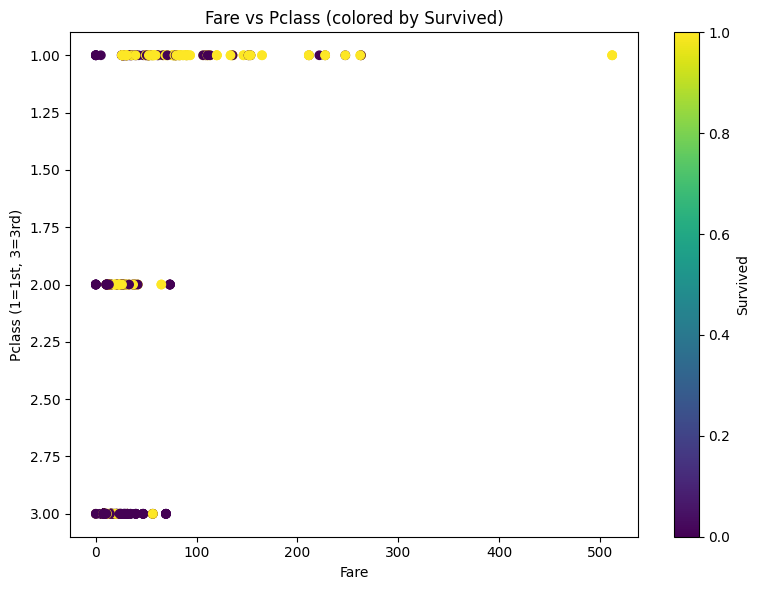

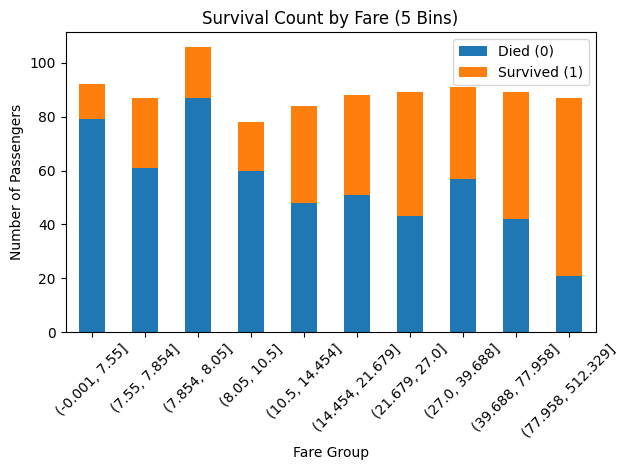

In [165]:
#運賃と生存の関係

plt.figure(figsize=(8,6))
plt.scatter(df_train['Fare'], df_train['Pclass'], c=df_train['Survived'])
plt.xlabel("Fare")
plt.ylabel("Pclass (1=1st, 3=3rd)")
plt.title("Fare vs Pclass (colored by Survived)")
plt.gca().invert_yaxis()  # 1等を上に
plt.colorbar(label="Survived")
plt.tight_layout()
plt.show()

df_train['Fare_bin'] = pd.qcut(df_train['Fare'], 10)
fare_survival = df_train.groupby(['Fare_bin','Survived']).size().unstack()

fare_survival.plot(kind='bar', stacked=True)
plt.title("Survival Count by Fare (5 Bins)")
plt.xlabel("Fare Group")
plt.ylabel("Number of Passengers")
plt.legend(['Died (0)', 'Survived (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#運賃が高い奴生存率高め


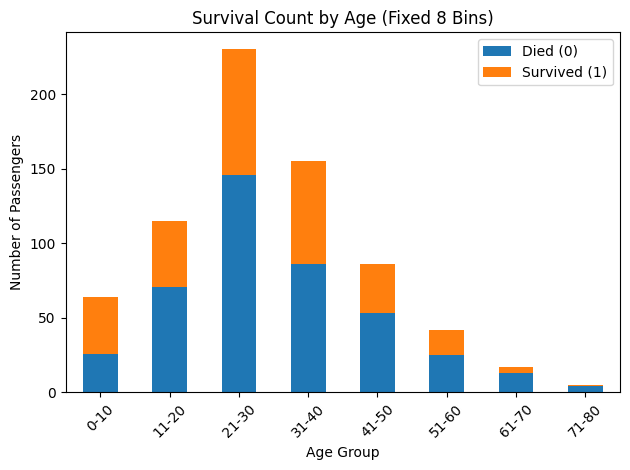

In [166]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40',
          '41-50', '51-60', '61-70', '71-80']

df_train['Age_bin'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=True)

# ② Age_bin × Survived で人数を集計
age_survival = df_train.groupby(['Age_bin', 'Survived']).size().unstack()

# ③ 積み上げ棒グラフで可視化
age_survival.plot(kind='bar', stacked=True)

plt.title("Survival Count by Age (Fixed 8 Bins)")
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.legend(['Died (0)', 'Survived (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#未成年の生存率高め

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


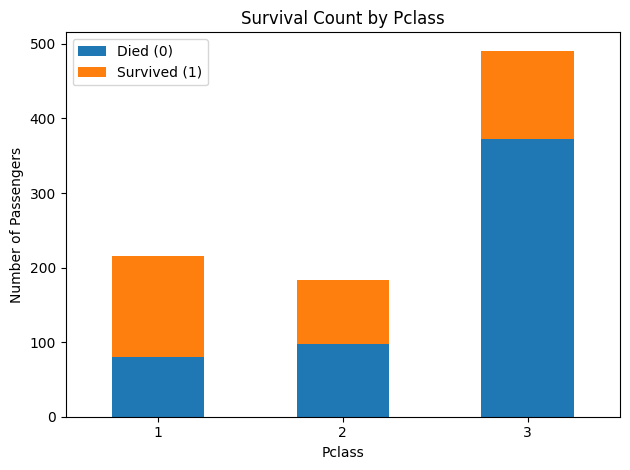

In [140]:
display(df_train.groupby('Pclass')['Survived'].mean())
sex_survival = df_train.groupby(['Pclass', 'Survived']).size().unstack()
sex_survival.plot(kind='bar', stacked=True)

plt.title("Survival Count by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Number of Passengers")
plt.legend(['Died (0)', 'Survived (1)'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

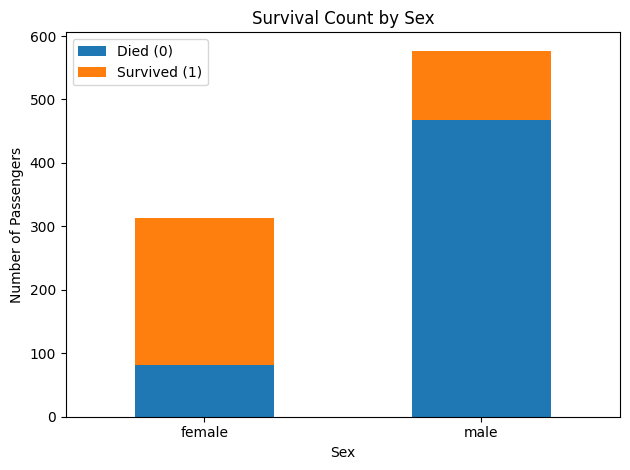

In [141]:
df_train.groupby('Sex')['Survived'].mean()
sex_survival = df_train.groupby(['Sex', 'Survived']).size().unstack()
sex_survival.plot(kind='bar', stacked=True)

plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.legend(['Died (0)', 'Survived (1)'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#女生存率高め



NameLen 最小値: 12
NameLen 最大値: 82


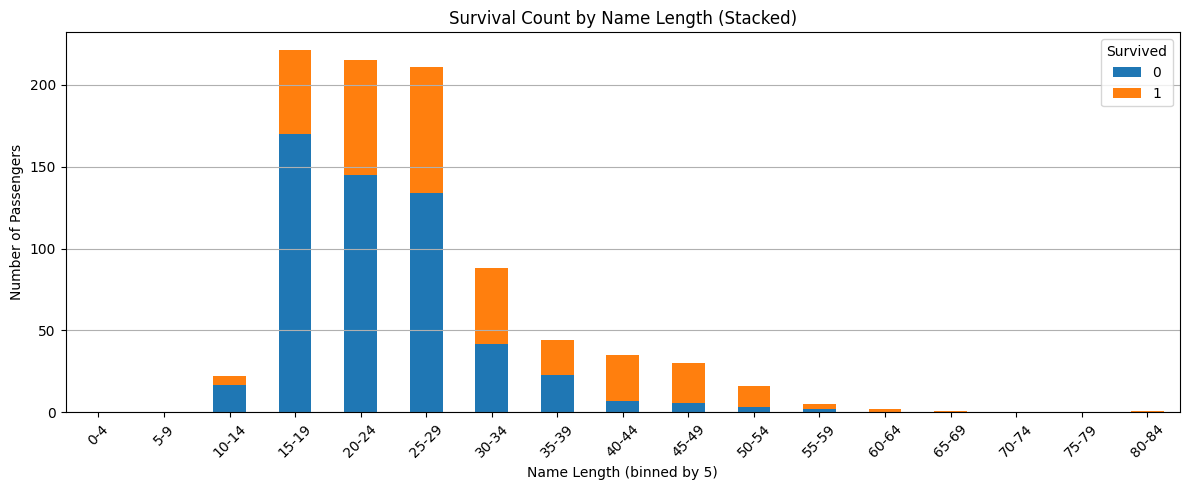

In [183]:
df_train["NameLen"] = df_train["Name"].apply(len)

max_len = df_train["NameLen"].max()
min_len = df_train["NameLen"].min()

print("NameLen 最小値:", min_len)
print("NameLen 最大値:", max_len)


import numpy as np

bins = np.arange(0, max_len + 5, 5)  # 0,5,10,...,max+5
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

df_train["NameLenBin"] = pd.cut(df_train["NameLen"], bins=bins, labels=labels)

name_survival_counts = (
    df_train
    .groupby(["NameLenBin", "Survived"])
    .size()
    .unstack()
    .fillna(0)
)

import matplotlib.pyplot as plt

name_survival_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 5)
)

plt.xlabel("Name Length (binned by 5)")
plt.ylabel("Number of Passengers")
plt.title("Survival Count by Name Length (Stacked)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


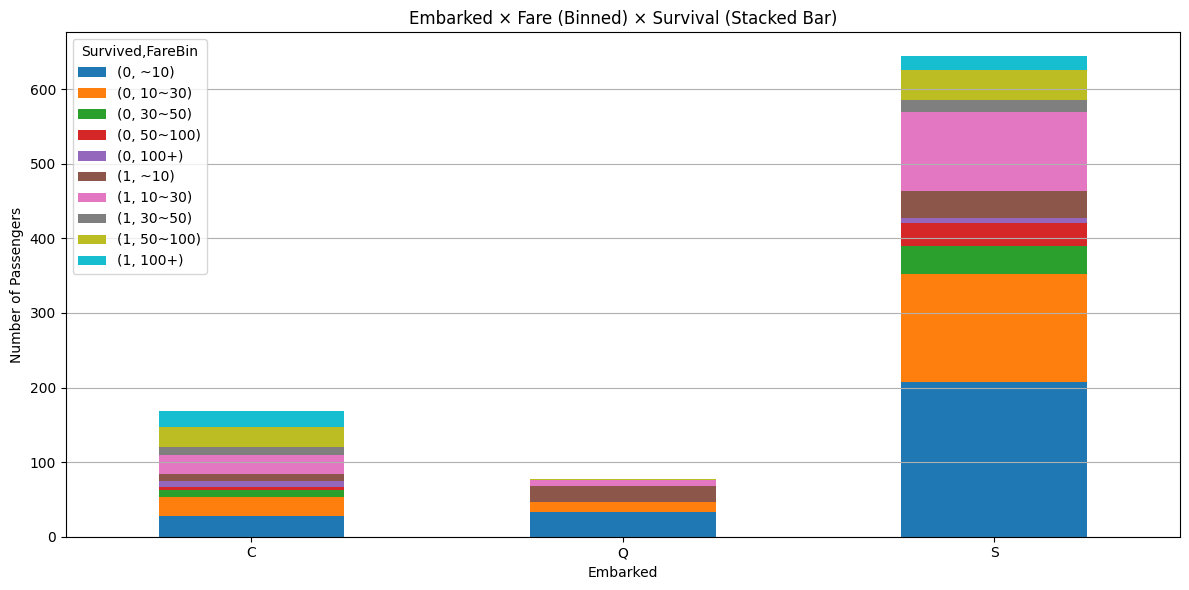

In [188]:
fare_bins = [-1, 10, 30, 50, 100, 600]
fare_labels = ["~10", "10~30", "30~50", "50~100", "100+"]

df_train["FareBin"] = pd.cut(df_train["Fare"], bins=fare_bins, labels=fare_labels)

fare_embarked_survival = (
    df_train
    .groupby(["Embarked", "FareBin", "Survived"])
    .size()
    .unstack(fill_value=0)
)


fare_embarked_survival.unstack().plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

plt.xlabel("Embarked")
plt.ylabel("Number of Passengers")
plt.title("Embarked × Fare (Binned) × Survival (Stacked Bar)")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()



0    24.0
Name: Age, dtype: float64


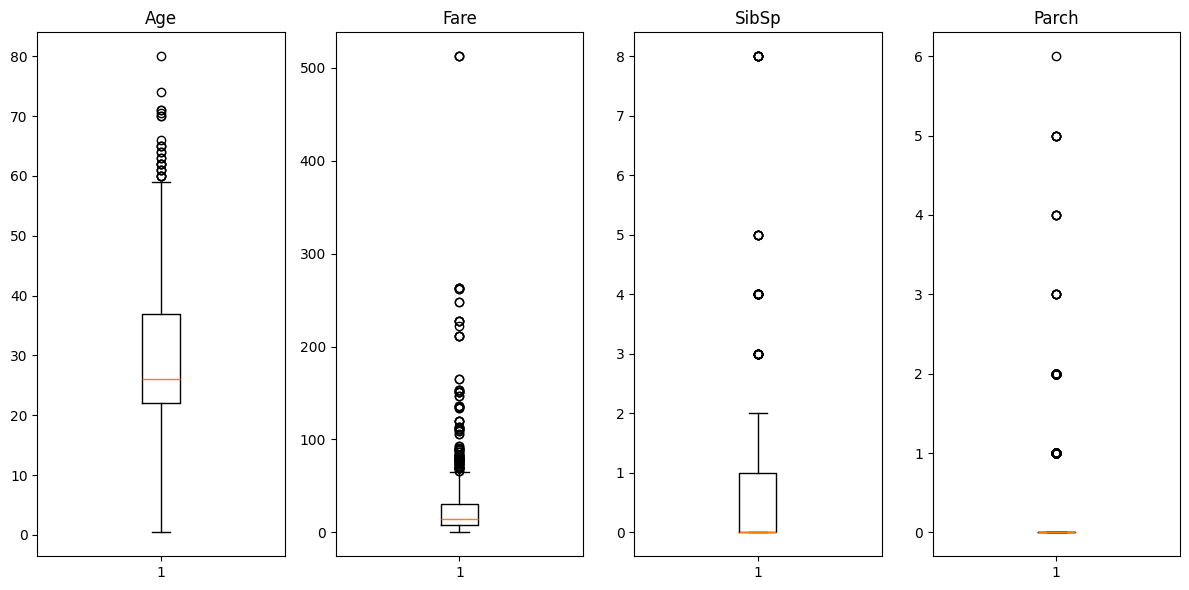

In [178]:



# display(df_train[df_train['Age'].isna()])
# Ageを最頻値で補完
print(df_train['Age'].mode())

#外れ値の確認

cols = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(12, 6))

for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    plt.boxplot(df_train[col].dropna())
    plt.title(col)

plt.tight_layout()
plt.show()



In [189]:
#Familysize
# train
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1

# test
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

#Isalone
# train
df_train["IsAlone"] = ((df_train["SibSp"] == 0) & (df_train["Parch"] == 0)).astype(int)

# test
df_test["IsAlone"] = ((df_test["SibSp"] == 0) & (df_test["Parch"] == 0)).astype(int)



In [195]:
from IPython.lib.security import random
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
# !pip install catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

display(df_train.head())

submit_file = './result_csv/submission_ver10.csv'

train_survived = df_train["Survived"]

df_train["NameLen"] = df_train["Name"].str.len()
df_test["NameLen"]  = df_test["Name"].str.len()

features = ["Pclass","Sex","Age","Fare","Embarked","FamilySize","IsAlone","NameLen"]

# ===== ① train：Pclass別の中央値で補完 =====

df_train["Age"] = df_train.groupby("Pclass")["Age"].transform(
    lambda x: x.fillna(x.median())
)

df_train["Fare"] = df_train.groupby("Pclass")["Fare"].transform(
    lambda x: x.fillna(x.median())
)



# ===== ② test：trainのPclass別中央値を使って補完 =====

for pclass in df_train["Pclass"].unique():
    age_median = df_train[df_train["Pclass"] == pclass]["Age"].median()
    fare_median = df_train[df_train["Pclass"] == pclass]["Fare"].median()

    df_test.loc[(df_test["Pclass"] == pclass) & (df_test["Age"].isnull()), "Age"] = age_median
    df_test.loc[(df_test["Pclass"] == pclass) & (df_test["Fare"].isnull()), "Fare"] = fare_median

# print("train 欠損数")
# print(df_train[["Age", "Fare"]].isnull().sum())

# print("test 欠損数")
# print(df_test[["Age", "Fare"]].isnull().sum())


train_feature = pd.get_dummies(df_train[features])
test_feature = pd.get_dummies(df_test[features])


###グリッドサーチ######
# ① 探索したいハイパーパラメータの候補
params = {
    "n_estimators": [300, 500, 700],
    "learning_rate": [0.01, 0.03, 0.05],
    "max_depth": [3, 4, 5],
    "num_leaves": [15, 31, 63],
    "min_data_in_leaf": [10, 20, 40],
}


model = lgb.LGBMClassifier(
    objective="binary",
    random_state=1
)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

gscv = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=cv,                  # 5分割交差検証
    scoring="accuracy",     # ここを "accuracy" にしてもOK
    n_jobs=-1,             # CPU全部使う
    verbose=1,             # 進捗ログ
)

gscv.fit(train_feature,train_survived)

print("ベストスコア（CV）:", gscv.best_score_)
print("ベストパラメータ:", gscv.best_params_)

# Fitting 5 folds for each of 72 candidates, totalling 360 fits
# ベストスコア（CV）: 0.8294143493817087
# ベストパラメータ: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}

#################################3

#欠損値確認➔testのFareにNan発見
# display(df_train[features].isnull().sum())
# display(df_test[features].isnull().sum())

# model = RandomForestClassifier(
#     n_estimators=500,
#     max_depth=7,
#     min_samples_leaf=1, # 葉に 3 人以上残す（過学習防止）
#     max_features="sqrt", # 分割ごとに特徴量の平方根だけ見る（デフォで良い）
#     random_state=1,
#     )

# model = LogisticRegression(max_iter=1000)

# model = lgb.LGBMClassifier(
#     n_estimators=500,
#     learning_rate=0.05,
#     max_depth=5,
#     min_data_in_leaf = 5,
#     random_state=42
# )

# model = ExtraTreesClassifier(
#     n_estimators=500,
#     random_state=42
# )

# model = CatBoostClassifier(
#     iterations=500,
#     learning_rate=0.05,
#     depth=5,
#     verbose=0
# )

# model.fit(train_feature, train_survived)
# predictions = model.predict(test_feature)


# output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
# output.to_csv(submit_file, index=False)
# print("Your submission was successfully saved!")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Fare_bin,Age_bin,NameLength,NameLengthBin,NameLen,NameLenBin,FareBin,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,"(-0.001, 7.55]",21-30,23,medium,23,20-24,~10,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,"(39.688, 77.958]",31-40,51,very_long,51,50-54,50~100,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,"(7.854, 8.05]",21-30,22,medium,22,20-24,~10,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,"(39.688, 77.958]",31-40,44,very_long,44,40-44,50~100,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,"(7.854, 8.05]",31-40,24,medium,24,20-24,~10,1,1


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 269
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga